# **Atividade 0 - Transformações Lineares**

Importamos a biblioteca `matplotlib` para criar as visualizações gráficas e o `numpy` para realizar os cálculos matriciais.

In [25]:
import matplotlib.pyplot as plt
import numpy as np

Definimos a função `plot_vectors` para criar a visualização dos vetores em um gráfico usando a função `plot_graph` como auxiliar.

In [26]:
def plot_vectors(
    titles: list[str],
    vectors_list: list[np.ndarray],
    *,
    comparison: bool,
) -> None:
    def plot_graph(vectors: list, ax: plt.Axes, title: str, colors: np.ndarray) -> None:
        ax.set_xlim(-8, 8)
        ax.set_ylim(-8, 8)
        ax.axhline(0, color="black", linewidth=1.5)
        ax.axvline(0, color="black", linewidth=1.5)
        ax.set_xticks(range(-8, 9))
        ax.set_yticks(range(-8, 9))
        ax.grid(visible=True)

        for i, (x, y) in enumerate(vectors):
            ax.quiver(0, 0, x, y, angles="xy", scale_units="xy", scale=1, color=colors[i], zorder=3)
            pos_x = x + 0.1
            pos_y = y + 0.1 if y >= 0 else y - 0.4
            ax.text(pos_x, pos_y, f"({x}, {y})", fontsize=12, color=colors[i])

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_title(title)

    colors = plt.cm.tab10(range(len(vectors_list[0])))

    if not comparison:
        _, ax = plt.subplots(figsize=(6, 6))
        plot_graph(vectors_list[0], ax, titles[0], colors)

    else:
        _, axes = plt.subplots(1, len(vectors_list), figsize=(6 * len(vectors_list), 6))
        for i, vector in enumerate(vectors_list):
            plot_graph(vector, axes[i], titles[i], colors)

    plt.show()

## 0.1 Vetores Unitários

Os vetores unitários de $\mathbb{R}^2$ são $\hat i = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ e $\hat j = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$. Dessa forma, matricialmente, temos $\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$.

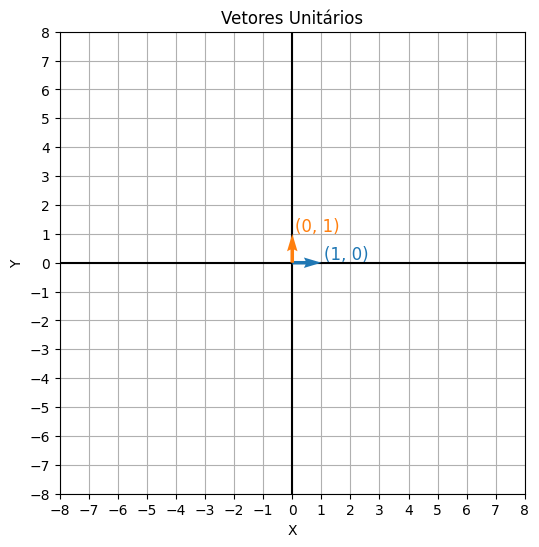

In [27]:
unit_vectors = [[1, 0], [0, 1]]

plot_vectors(["Vetores Unitários"], [unit_vectors], comparison=False)

## 0.2 Rotação Horária de 90°

### 0.2.1 Explicação

Aplicar uma rotação horário de 90° nos vetores unitários fará o $\hat i$ que está no ponto $(1, 0)$ ir para o $(0, -1)$ e o $\hat j$ que está no ponto $(0, 1)$ ir para o $(1, 0)$. Ou seja, após a rotação, $\hat i = \begin{bmatrix} 0 \\ -1 \end{bmatrix}$ e $\hat j = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$. Dessa forma, matricialmente, temos $\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$,

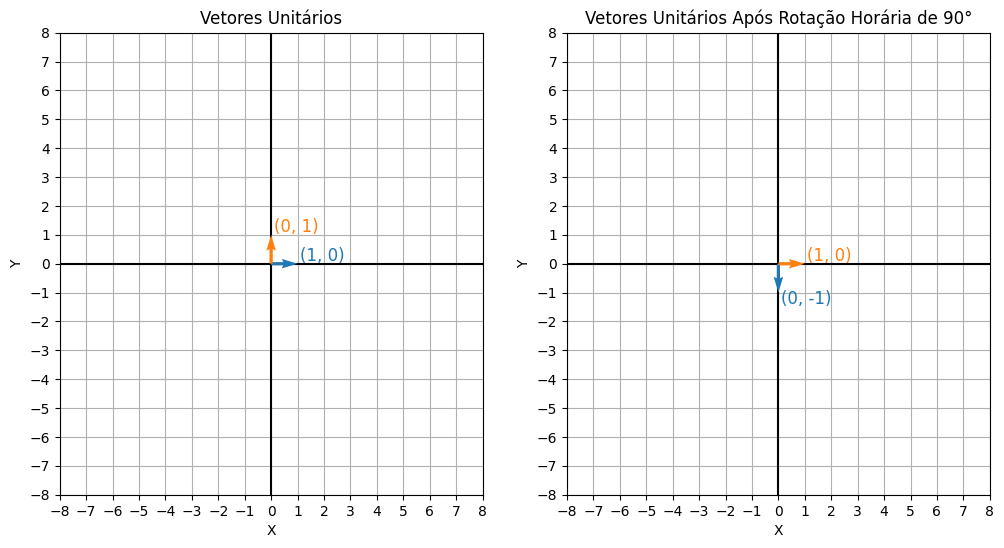

In [28]:
unit_vectors = [[1, 0], [0, 1]]
rotationed_unit_vectors = [[0, -1], [1, 0]]

plot_vectors(
    ["Vetores Unitários", "Vetores Unitários Após Rotação Horária de 90°"],
    [unit_vectors, rotationed_unit_vectors],
    comparison=True,
)

Assim, concluímos que a matriz de rotação horária de 90° é dada por $R = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$.

In [29]:
rotation_matrix = np.array([[0, 1], [-1, 0]])

### 0.2.2 Exemplo

Usamos 2 vetores arbitrários e multiplicamos cada um pela matriz de rotação horária de 90° encontrada anteriormente para obter os vetores transformados.

$$
R =
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix},
\quad
V =
\begin{bmatrix}
2 & -1\\
3 & 2
\end{bmatrix}
$$

$$
RV =
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
\begin{bmatrix}
2 & -1\\
3 & 2
\end{bmatrix}
=
\begin{bmatrix}
3 & 2\\
-2 & 1
\end{bmatrix}
$$


Matriz de Vetores Arbitrários:
[[ 2 -1]
 [ 3  2]]
Matriz de Vetores Arbitrários Após Rotação Horária de 90°:
[[ 3  2]
 [-2  1]]


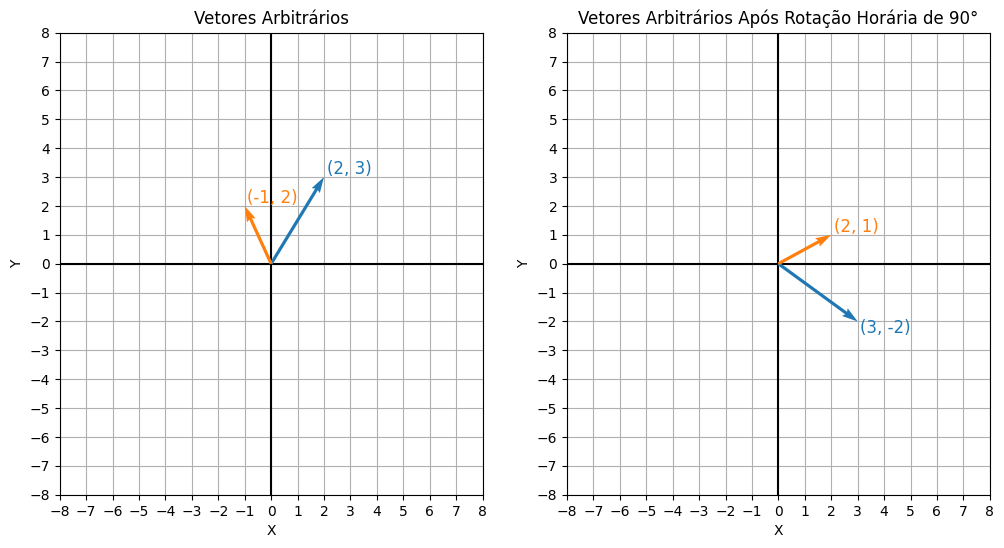

In [30]:
vectors = np.array([[2, 3], [-1, 2]])
rotationed_vectors = np.array([rotation_matrix @ vector for vector in vectors])

print("Matriz de Vetores Arbitrários:")
print(vectors.T)

print("Matriz de Vetores Arbitrários Após Rotação Horária de 90°:")
print(rotationed_vectors.T)

plot_vectors(
    ["Vetores Arbitrários", "Vetores Arbitrários Após Rotação Horária de 90°"],
    [vectors, rotationed_vectors],
    comparison=True,
)

## 0.3 *Shear* Horizontal

### 0.3.1 Explicação

O shear em $x$ (horizontal) é uma transformação que empurra para os lados todos os vetores (ou pontos) proporcionalmente ao valor de $y$. Aplicar um *shear* horizontal usando $2$ como uma constante de proporcionalidade fará o $\hat i$ se manter no ponto $(1, 0)$, uma vez que a sua coordenada $y$ é $0$ e o $\hat j$ que está no ponto $(0, 1)$ ir para o $(2, 1)$. Ou seja, após a aplicação do *shear* horizontal, $\hat i = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ e $\hat j = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$. Dessa forma, matricialmente, temos $\begin{bmatrix} 1 & 2 \\ 0 & 1 \end{bmatrix}$,

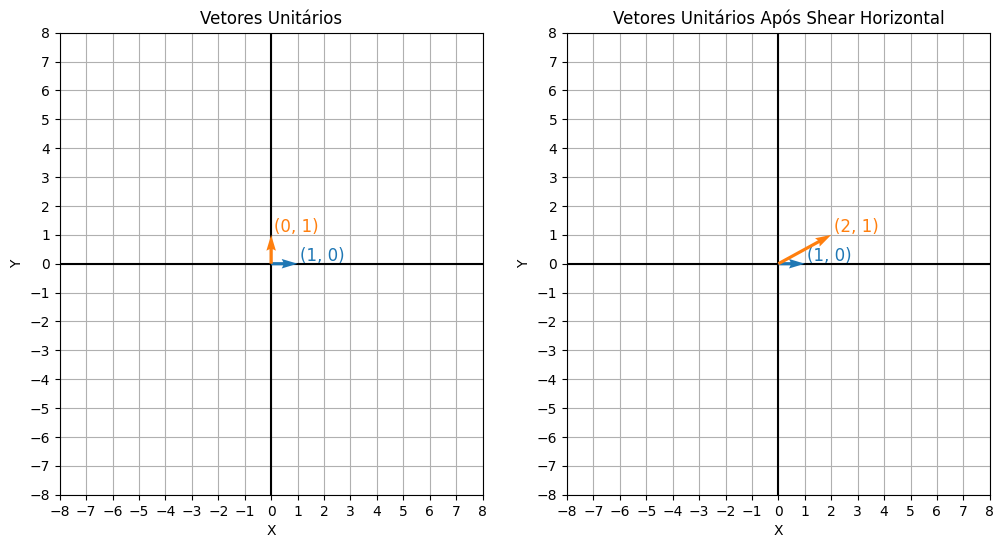

In [31]:
unit_vectors = [[1, 0], [0, 1]]
sheared_unit_vectors = [[1, 0], [2, 1]]

plot_vectors(
    ["Vetores Unitários", "Vetores Unitários Após Shear Horizontal"],
    [unit_vectors, sheared_unit_vectors],
    comparison=True,
)

Generalizando para qualquer constante de proporcionalidade $k$, concluímos que a matriz de *shear* horizontal é dada por $S_x = \begin{bmatrix} 1 & k \\ 0 & 1 \end{bmatrix}$. Onde a transformação linear aplicada é $T(x, y) = (x + ky, y)$.

In [32]:
def get_shear_matrix(k: float) -> np.ndarray:
    return np.array([[1, k], [0, 1]])

### 0.3.2 Exemplo

Usamos 2 vetores arbitrários e multiplicamos cada um pela matriz de shear horizontal, com $k = 2$, encontrada anteriormente para obter os vetores transformados.

$$
S_x =
\begin{bmatrix}
1 & 2\\
0 & 1
\end{bmatrix},
\quad
V =
\begin{bmatrix}
1 & -1\\
2 & -1
\end{bmatrix}
$$

$$
S_xV =
\begin{bmatrix}
1 & 2\\
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & -1\\
2 & -1
\end{bmatrix}
=
\begin{bmatrix}
5 & -3\\
2 & -1
\end{bmatrix}
$$


Matriz de Shear Horizontal (k = 2):
[[1 0]
 [2 1]]
Matriz de Vetores Arbitrários:
[[ 1 -1]
 [ 2 -1]]
Matriz de Vetores Arbitrários Após Shear Horizontal:
[[ 5 -3]
 [ 2 -1]]


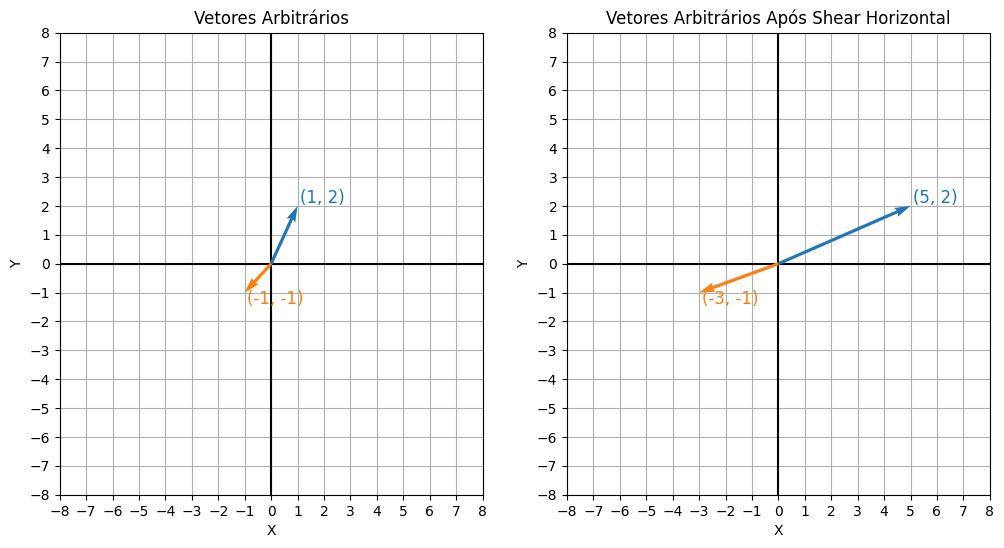

In [33]:
k = 2
shear_matrix = get_shear_matrix(k)

vectors = np.array([[1, 2], [-1, -1]])
sheared_vectors = np.array([shear_matrix @ vector for vector in vectors])

print(f"Matriz de Shear Horizontal (k = {k}):")
print(shear_matrix.T)

print("Matriz de Vetores Arbitrários:")
print(vectors.T)

print("Matriz de Vetores Arbitrários Após Shear Horizontal:")
print(sheared_vectors.T)

plot_vectors(
    ["Vetores Arbitrários", "Vetores Arbitrários Após Shear Horizontal"],
    [vectors, sheared_vectors],
    comparison=True,
)

## 0.4 Aplicação das Duas Transformações

Usamos esses 2 vetores arbitrários para a aplicação das duas transformações.

In [ ]:
vectors = np.array([[2, 2], [-2, 3]])

plot_vectors(
    ["Vetores Arbitrários"],
    [vectors],
    comparison=False,
)

### 0.4.1 Rotação Horária de 90° + *Shear* Horizontal

Multiplicamos cada um dos vetores arbitrários primeiramente pela matriz de rotação horária de 90° e depois pela matriz de shear horizontal, com $k = 2$, encontradas anteriormente para obter os vetores transformados.

$$
R =
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix},
\quad
S_x =
\begin{bmatrix}
1 & 2\\
0 & 1
\end{bmatrix},
\quad
V =
\begin{bmatrix}
2 & -1\\
3 & 2
\end{bmatrix}
$$

$$
RV =
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
\begin{bmatrix}
2 & -1\\
3 & 2
\end{bmatrix}
=
\begin{bmatrix}
3 & 2\\
-2 & 1
\end{bmatrix}
$$

$$
S_xRV =
\begin{bmatrix}
1 & 2\\
0 & 1
\end{bmatrix}
\begin{bmatrix}
3 & 2\\
-2 & 1
\end{bmatrix}
=
\begin{bmatrix}
1 & 4\\
-2 & 1
\end{bmatrix}
$$


Matriz de Vetores Arbitrários:
[[ 2 -2]
 [ 2  3]]
Matriz de Vetores Arbitrários Após Rotação Horária de 90°:
[[ 2  3]
 [-2  2]]
Matriz de Vetores Arbitrários Após Rotação Horária de 90° e Shear Horizontal:
[[-2  7]
 [-2  2]]


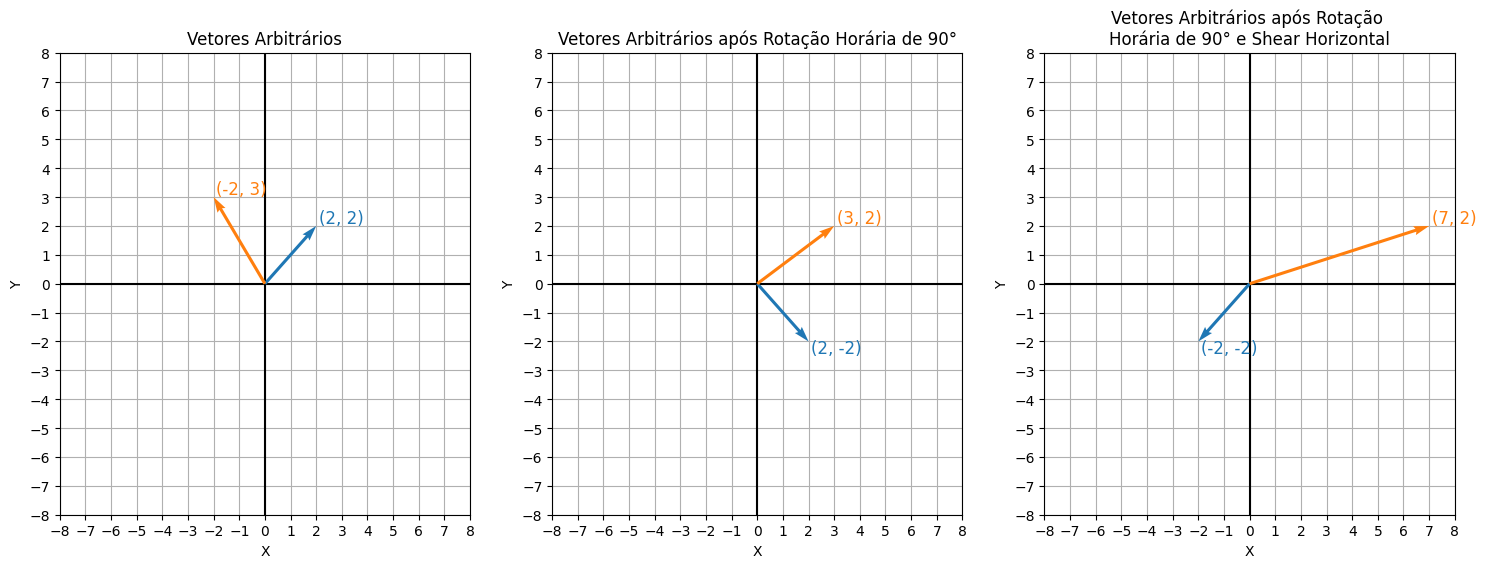

In [36]:
rotationed_vectors = np.array([rotation_matrix @ vector for vector in vectors])
rotationed_sheared_vectors = np.array([shear_matrix @ vector for vector in rotationed_vectors])

print("Matriz de Vetores Arbitrários:")
print(vectors.T)

print("Matriz de Vetores Arbitrários Após Rotação Horária de 90°:")
print(rotationed_vectors.T)

print("Matriz de Vetores Arbitrários Após Rotação Horária de 90° e Shear Horizontal:")
print(rotationed_sheared_vectors.T)

plot_vectors(
    [
        "Vetores Arbitrários",
        "Vetores Arbitrários após Rotação Horária de 90°",
        "Vetores Arbitrários após Rotação \nHorária de 90° e Shear Horizontal",
    ],
    [vectors, rotationed_vectors, rotationed_sheared_vectors],
    comparison=True,
)

### 0.4.2 *Shear* Horizontal + Rotação Horária de 90°

Multiplicamos cada um dos vetores arbitrários primeiramente pela  matriz de shear horizontal, com $k = 2$, e depois pela matriz de rotação horária de 90° encontradas anteriormente para obter os vetores transformados.

$$
R =
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix},
\quad
S_x =
\begin{bmatrix}
1 & 2\\
0 & 1
\end{bmatrix},

\quad
V =
\begin{bmatrix}
2 & -1\\
3 & 2
\end{bmatrix}
$$

$$
S_xV =
\begin{bmatrix}
1 & 2\\
0 & 1
\end{bmatrix}
\begin{bmatrix}
2 & -1\\
3 & 2
\end{bmatrix}
=
\begin{bmatrix}
8 & 3\\
3 & 2
\end{bmatrix}
$$

$$
RS_xV =
\begin{bmatrix}
0 & 1\\
-1 & 0
\end{bmatrix}
\begin{bmatrix}
8 & 3\\
3 & 2
\end{bmatrix}
=
\begin{bmatrix}
3 & 2\\
-8 & -3
\end{bmatrix}
$$


Matriz de Vetores Arbitrários:
[[ 2 -2]
 [ 2  3]]
Matriz de Vetores Arbitrários Após Rotação Horária de 90°:
[[6 4]
 [2 3]]
Matriz de Vetores Arbitrários Após Rotação Horária de 90° e Shear:
[[ 2  3]
 [-6 -4]]


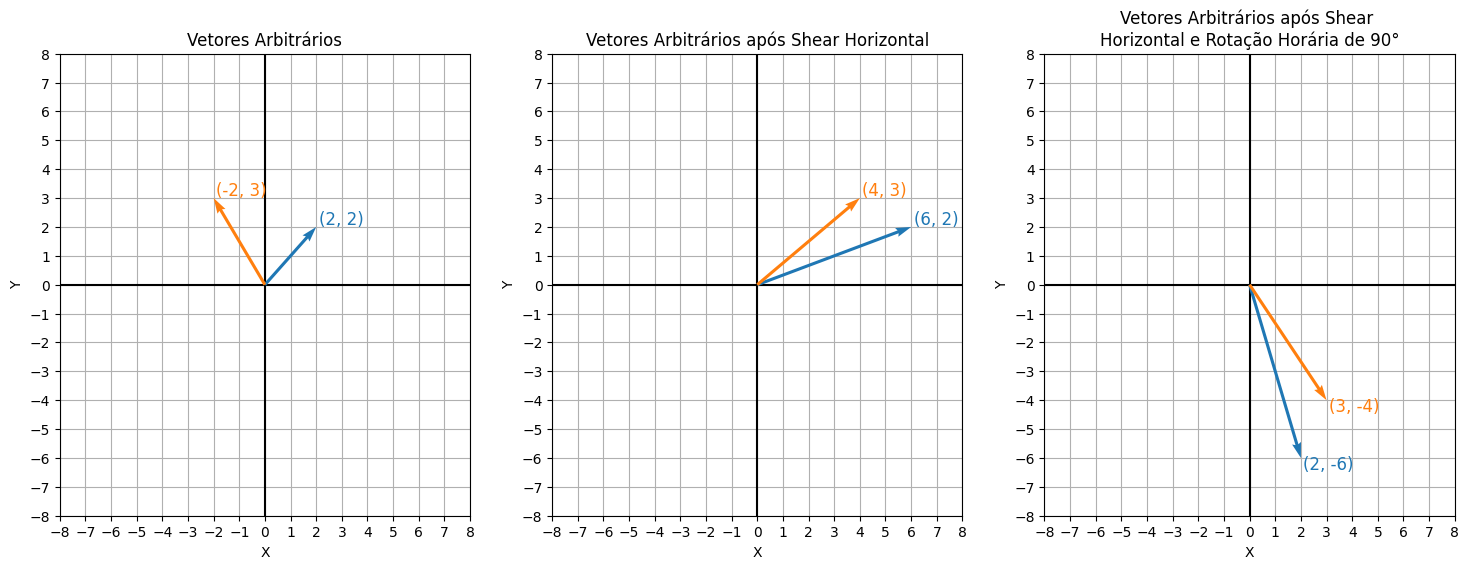

In [37]:
sheared_vectors = np.array([shear_matrix @ vector for vector in vectors])
sheared_rotationed_vectors = np.array([rotation_matrix @ vector for vector in sheared_vectors])

print("Matriz de Vetores Arbitrários:")
print(vectors.T)

print("Matriz de Vetores Arbitrários Após Rotação Horária de 90°:")
print(sheared_vectors.T)

print("Matriz de Vetores Arbitrários Após Rotação Horária de 90° e Shear:")
print(sheared_rotationed_vectors.T)

plot_vectors(
    [
        "Vetores Arbitrários",
        "Vetores Arbitrários após Shear Horizontal",
        "Vetores Arbitrários após Shear \nHorizontal e Rotação Horária de 90°",
    ],
    [vectors, sheared_vectors, sheared_rotationed_vectors],
    comparison=True,
)